Q1: 5.38, Q3: 7.62, IQR: 2.25
W_low: 3.12, W_high: 10.62
Median: 6.88


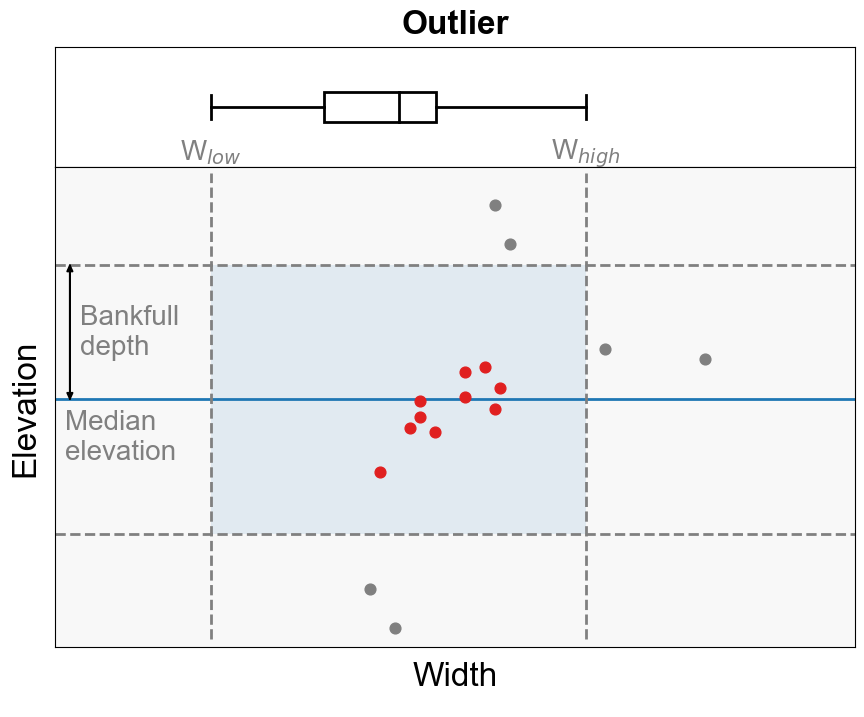

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 20
plt.rcParams['text.color'] = '#808080'
plt.rcParams['axes.facecolor'] = '#F8F8F8'
plt.rcParams['axes.titlesize'] = 24
plt.rcParams['axes.labelsize'] = 24
plt.rcParams['axes.titlepad'] = 10
plt.rcParams['axes.labelpad'] = 10

fig = plt.figure(figsize=(10, 12))

# Boxplot axis
ax1 = plt.axes([0.1, 0.50, 0.8, 0.1])  # Boxplot position
# Scatter plot axis
ax2 = plt.axes([0.1, 0.1, 0.8, 0.4])   # Scatter plot position
# Connecting lines axis
ax3 = plt.axes([0.1, 0.05, 0.8, 0.57])  # Connecting lines position

# Generate data points from the original histogram
bar = [1, 2, 0, 4, 10, 18, 21, 37, 41, 21, 18, 10, 4, 2, 1, 1, 0, 2, 0, 1]
bin_centers = np.arange(0.875, 15.5, 0.75)

# Reconstruct data from histogram
data = []
for count, center in zip(bar, bin_centers):
    data.extend([center] * count)
data = np.array(data)

# Calculate Q1, Q3, IQR
Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)
IQR = Q3 - Q1
W_low = Q1 - 1.5 * IQR
W_high = Q3 + 1.5 * IQR
median = np.median(data)

# Clip whiskers to actual data range
W_low_actual = max(W_low, data.min())
W_high_actual = min(W_high, data.max())

# Find actual whisker positions (furthest points within bounds)
W_low_actual = data[data >= W_low].min()
W_high_actual = data[data <= W_high].max()

# Identify outliers
outliers = data[(data < W_low) | (data > W_high)]

# Boxplot section (ax1)
box_y = 0.5  # vertical position of boxplot
box_height = 0.25

# Draw box (Q1 to Q3) - hollow
rect = plt.Rectangle((Q1, box_y - box_height/2), Q3 - Q1, box_height, 
                       fill=False, ec='black', lw=2)
ax1.add_patch(rect)

# Draw median line
ax1.plot([median, median], [box_y - box_height/2, box_y + box_height/2], 
         color='black', lw=2)

# Draw whiskers
ax1.plot([W_low_actual, Q1], [box_y, box_y], color='black', lw=2)
ax1.plot([Q3, W_high_actual], [box_y, box_y], color='black', lw=2)

# Draw whisker caps
cap_height = 0.1
ax1.plot([W_low_actual, W_low_actual], [box_y - cap_height, box_y + cap_height], 
         color='black', lw=2)
ax1.plot([W_high_actual, W_high_actual], [box_y - cap_height, box_y + cap_height], 
         color='black', lw=2)

# Labels
ax1.text(W_low_actual, 0.25, 'W$_{low}$', ha='center', va='top')
ax1.text(W_high_actual, 0.25, 'W$_{high}$', ha='center', va='top')

# Adjust ax1's bottom spine position manually if needed
ax1.spines['bottom'].set_position(('outward', 0))  # Ensure it is at the outermost edge

ax1.spines['top'].set_visible(True)
ax1.spines['left'].set_visible(True)
ax1.spines['right'].set_visible(True)
ax1.spines['bottom'].set_visible(True)
ax1.set_xlim(0, 16)
ax1.set_ylim(0, 1)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_facecolor('white')
ax1.set_title('Outlier', weight='bold', color='black')

# SWOT outlier section (ax2)
x_swot = [6.5, 7.3, 7.6, 8.2, 7.3, 8.2, 8.6, 8.9, 7.1, 8.8]
y_swot = [4.1, 7.8, 6.2, 8.0, 7.0, 9.3, 9.6, 8.5, 6.4, 7.4]
x_filter = [6.3, 6.8, 8.8, 9.1, 11, 13]
y_filter = [-2, -4, 18, 16, 10.5, 10]

ax2.scatter(x_swot, y_swot, color='#E02020', s=60, zorder=2)
ax2.scatter(x_filter, y_filter, color='#808080', s=60, zorder=2)
ax2.plot([0, 16], [7.9, 7.9], color='#1f77b4', lw=2, zorder=0)
ax2.plot([0, 16], [0.9, 0.9], color='#808080', ls='--', lw=2, zorder=0)
ax2.plot([0, 16], [14.9, 14.9], color='#808080', ls='--', lw=2, zorder=0)
ax2.fill_between([W_low_actual, W_high_actual], [14.9, 14.9], [0.9, 0.9], 
                  color='#1f77b4', lw=0, alpha=0.1, zorder=-1)

ax2.arrow(0.3, 7.9, 0, 7, width=0.01, head_width=0.12, head_length=0.35, 
          length_includes_head=True, color='black')
ax2.arrow(0.3, 14.9, 0, -7, width=0.01, head_width=0.12, head_length=0.35, 
          length_includes_head=True, color='black')
ax2.text(0.5, 11.4, 'Bankfull\ndepth', ha='left', va='center')
ax2.text(0.2, 7.4, 'Median\nelevation', ha='left', va='top')

# Adjust ax2's top spine position manually
ax2.spines['top'].set_position(('outward', 0))  # Ensure it is at the outermost edge

ax2.set_xlim(0, 16)
ax2.set_ylim(-5, 20)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_xlabel('Width')
ax2.set_ylabel('Elevation')

# Connecting lines (ax3)
ax3.plot([W_low_actual, W_low_actual], [0.1, 0.780], color='#808080', ls='--', lw=2)
ax3.plot([W_high_actual, W_high_actual], [0.1, 0.780], color='#808080', ls='--', lw=2)
ax3.set_facecolor((0, 0, 0, 0))
ax3.set_xticks([])
ax3.set_yticks([])
ax3.set_xlim(0, 16)
ax3.set_ylim(0, 1)
ax3.spines['top'].set_visible(False)
ax3.spines['left'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['bottom'].set_visible(False)

# Adjust spacing to ensure there are no gaps between the axes
plt.subplots_adjust(hspace=0)  # Reduces space between axes

plt.savefig('./fig3c_boxplot.png', dpi=200)
print(f"Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
print(f"W_low: {W_low_actual:.2f}, W_high: {W_high_actual:.2f}")
print(f"Median: {median:.2f}")
